# **1. Setup**

# PARTE 1 - DESARROLLO

## Establecer Entorno de Trabajo

In [11]:
# Check python version
import sys
sys.version

'3.9.13 (main, Aug 25 2022, 23:26:10) \n[GCC 11.2.0]'

In [12]:
!nvidia-smi

Sun Jun  9 00:57:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:01:00.0  On |                  N/A |
| 32%   37C    P3              29W / 170W |    673MiB / 12288MiB |     15%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Instalacion de paquetes necesarios

In [13]:
# Install pytorch for python 3.10 with CUDA 11.8 support
!pip3 install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/819.2 MB 10.5 MB/s eta 0:01:11^C
     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/819.2 MB 10.7 MB/s eta 0:01:10
ERROR: Operation cancelled by user


In [ ]:
!pip install Pillow==9.4.0
!pip show pillow #check pillow version

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: bokeh, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, torchvision, wordcloud


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !mkdir /content/gdrive/My\ Drive/P1aplicacionesIA

In [ ]:
# !ls /content/gdrive/My\ Drive/P1aplicacionesIA

In [ ]:
#move to a specific directory
import os
os.chdir('/content/gdrive/My Drive/P1aplicacionesIA/')
!pwd

/content/gdrive/My Drive/P1aplicacionesIA


# **2. Carga de conjuntos de datos/imágenes (datasets)**

## Manejo de Datasets


### Datasets por defecto

#### Descarga CIFAR10

In [1]:
import subprocess
import os
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import time

/home/merve/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/merve/anaconda3/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
download_dir = './data' #download directory
trainset = torchvision.datasets.CIFAR10(root=download_dir, train=True, download=True, transform=transform) #train set
testset = torchvision.datasets.CIFAR10(root=download_dir, train=False, download=True, transform=transform) #test set

print('Train dataset with ' + str(len(trainset)) + ' images')
print('Test dataset with ' + str(len(testset)) + ' images')

Files already downloaded and verified
Files already downloaded and verified
Train dataset with 50000 images
Test dataset with 10000 images


In [3]:
# number of samples/images per group
batch_size = 6

#load & convert images to tensors in Python
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True, num_workers=2)
trainloader_len = len(trainloader)

testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False, num_workers=2)
testloader_len = len(testloader)

classes = ('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Loaders done.')
print('Each batch with ' + str(batch_size) + ' samples/images')
print(f"Train dataset with {trainloader_len} batches")
print(f"Test dataset with {testloader_len} batches")
print('Available classes:')
print(classes)

Loaders done.
Each batch with 6 samples/images
Train dataset with 8334 batches
Test dataset with 1667 batches
Available classes:
('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#### Visualización

In [4]:
# function to un-normalize and display an image
def imshow(img):
  img = img / 2 + 0.5 #desnormalizar
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

deer truck truck plane horse horse 

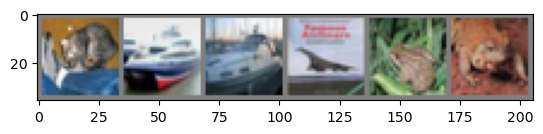

In [5]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Concatenate images
imgconcat = torchvision.utils.make_grid(images)

# Show image
imshow(imgconcat)

# Print labels
for i in range(batch_size):
  print(classes[labels[i]], end=' ')



### Bonus Transformaciones de Los Datos

 deer


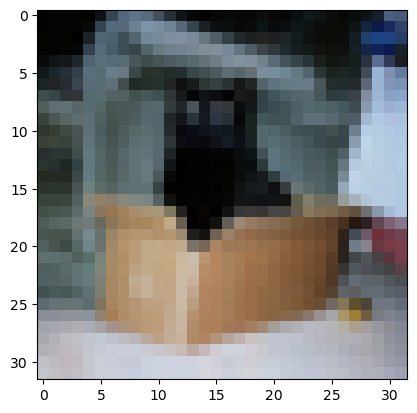

In [6]:
#load a sample batch from previous section
dataiter = iter(trainloader)
images, labels = next(dataiter)

#display first image of the batch
imshow(images[0])
print ('%5s' % classes[labels[0]])

 deer


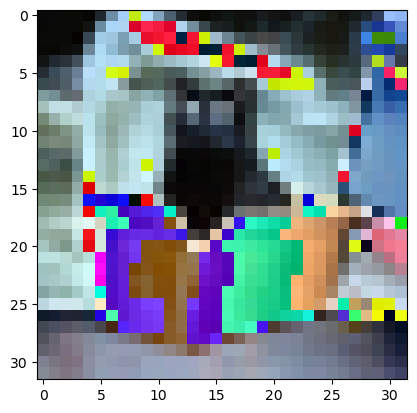

In [7]:
to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)
print ('%5s' % classes[labels[0]])

# **3. Definición de la red neuronal convolucional**

In [8]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    # Convolutional Layer
    self.conv1 = nn.Conv2d(3,16,3, padding=1)
    self.conv2 = nn.Conv2d(16,32,3,padding=1)
    self.conv3 = nn.Conv2d(32,64,3,padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*4*4,120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60,10)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):

    x =  self.pool(F.relu(self.conv1(x)))
    x =  self.pool(F.relu(self.conv2(x)))
    x =  self.pool(F.relu(self.conv3(x)))
    x =  x.view(-1,64*4*4)
    x =  self.dropout(x)
    x = F.relu(self.fc1(x))
    x =  self.dropout(x)
    x = F.relu(self.fc2(x))
    x =  self.dropout(x)
    x = self.fc3(x)
    return x


model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [10]:
# Training the model
display_batch_iter = 100
number_epochs = 30

epochs_loss = np.zeros(number_epochs)
epochs_train_accuracy = np.zeros(number_epochs)
epochs_test_accuracy = np.zeros(number_epochs)
train_time = 0.0

Ntrain = len(trainset)
Ntest = len(testset)

start = time.time()

print('Training the model in CPU mode #epochs=%d batches=%d batch_size=%d' % (number_epochs, trainloader_len, batch_size))

model.train()

for epoch in range(number_epochs):
    running_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        epochs_loss[epoch] += loss.item()
        if i % display_batch_iter == display_batch_iter-1:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / display_batch_iter}')
            running_loss = 0.0
    
    # Compute the accuracy on the training set
    correct1 = 0.0
    for data in trainloader:
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, predicted = torch.max(outputs.data, 1)
        correct1 += (predicted == labels).sum().item()

    # Compute the accuracy on the test set
    correct2 = 0.0
    for data in testloader:
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, predicted = torch.max(outputs.data, 1)
        correct2 += (predicted == labels).sum().item()

    epoch_loss = epochs_loss[epoch] / len(trainloader)        # average loss per batch
    epochs_train_accuracy[epoch] = 100 * correct1 / Ntrain    # average accuracy on the training set
    epochs_test_accuracy[epoch] = 100 * correct2 / Ntest      # average accuracy on the test set
    print(f'Epoch: {epoch + 1}, Loss: {epoch_loss}, Train Accuracy: {epochs_train_accuracy[epoch]}, Test Accuracy: {epochs_test_accuracy[epoch]}')


    # Validate the model
    model.eval()
    for data, target in testloader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item()

    # Calculate the average loss
    test_loss /= len(testloader.dataset)
    running_loss /= len(trainloader.dataset)

    print(f'Epoch: {epoch + 1}, Training Loss: {running_loss}, Test Loss: {test_loss}')


train_time = time.time() - start
print(f'Finished Training in {train_time} seconds')




# Save the model
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

# print('Finished Training')

Training the model in CPU mode #epochs=30 batches=8334 batch_size=6
[1, 100] loss: 2.307068314552307
[1, 200] loss: 2.3092855286598204
[1, 300] loss: 2.3010031008720397
[1, 400] loss: 2.3094450998306275
[1, 500] loss: 2.3009312772750854
[1, 600] loss: 2.3025480341911315
[1, 700] loss: 2.3027563667297364
[1, 800] loss: 2.2987812614440917
[1, 900] loss: 2.299974970817566
[1, 1000] loss: 2.3004533195495607
[1, 1100] loss: 2.297830538749695
[1, 1200] loss: 2.2919524240493776
[1, 1300] loss: 2.288418595790863
[1, 1400] loss: 2.2848060584068297
[1, 1500] loss: 2.272458965778351
[1, 1600] loss: 2.2491542077064515
[1, 1700] loss: 2.247234628200531
[1, 1800] loss: 2.2298913073539732
[1, 1900] loss: 2.233212276697159
[1, 2000] loss: 2.197002681493759
[1, 2100] loss: 2.1987557113170624
[1, 2200] loss: 2.1582621359825134
[1, 2300] loss: 2.126193140745163
[1, 2400] loss: 2.0871403765678407
[1, 2500] loss: 2.1068654465675354
[1, 2600] loss: 2.0774360489845276
[1, 2700] loss: 2.117257388830185
[1, 28

/tmp/ipykernel_7649/1236931413.py:67: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)


Epoch: 1, Training Loss: 0.0011374427688121795, Test Loss: 0.2634882033586502
[2, 100] loss: 1.5294091069698335
[2, 200] loss: 1.6239853918552398
[2, 300] loss: 1.529422105550766
[2, 400] loss: 1.5582368820905685
[2, 500] loss: 1.4977974236011504
[2, 600] loss: 1.493705723285675
[2, 700] loss: 1.4891219907999038
[2, 800] loss: 1.5366210287809372
[2, 900] loss: 1.558177198767662
[2, 1000] loss: 1.4243337953090667
[2, 1100] loss: 1.4766411340236665
[2, 1200] loss: 1.501657435297966
[2, 1300] loss: 1.535422416329384
[2, 1400] loss: 1.5193533712625504
[2, 1500] loss: 1.482212826013565
[2, 1600] loss: 1.4959289860725402
[2, 1700] loss: 1.5102126169204713
[2, 1800] loss: 1.4504503577947616
[2, 1900] loss: 1.3960634717345237
[2, 2000] loss: 1.4699947541952134
[2, 2100] loss: 1.4776175343990325
[2, 2200] loss: 1.4173695254325867
[2, 2300] loss: 1.5082081753015517
[2, 2400] loss: 1.4790301287174226
[2, 2500] loss: 1.4627183943986892
[2, 2600] loss: 1.4532730588316918
[2, 2700] loss: 1.416602504

In [11]:
# Validate the model on the test set
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
for data, target in testloader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()

    # convert output probabilities to predicted class
    _, pred = torch.max(output.data, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy())

    # calculate test accuracy for each object class
    batch_size = len(target)
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss /= len(testloader.dataset)
print(f'Test Loss: {test_loss}\n')

for i in range(9):
    if class_total[i] > 0:
        print(f'Test Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]} ({np.sum(class_correct[i])}/{np.sum(class_total[i])})')
    else:
        print(f'Test Accuracy of {classes[i]}: N/A (no training examples)')

print(f'\nTest Accuracy (Overall): {100. * np.sum(class_correct) / np.sum(class_total)} ({np.sum(class_correct)}/{np.sum(class_total)})')

/tmp/ipykernel_7649/1576262254.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)


Test Loss: 0.2655963645178197

Test Accuracy of plane: 70.9 (709.0/1000.0)
Test Accuracy of car: 82.4 (824.0/1000.0)
Test Accuracy of bird: 57.2 (572.0/1000.0)
Test Accuracy of deer: 50.6 (506.0/1000.0)
Test Accuracy of dog: 67.1 (671.0/1000.0)
Test Accuracy of frog: 65.6 (656.0/1000.0)
Test Accuracy of horse: 77.0 (770.0/1000.0)
Test Accuracy of ship: 73.6 (736.0/1000.0)
Test Accuracy of truck: 79.7 (797.0/1000.0)

Test Accuracy (Overall): 70.88 (7088.0/10000.0)


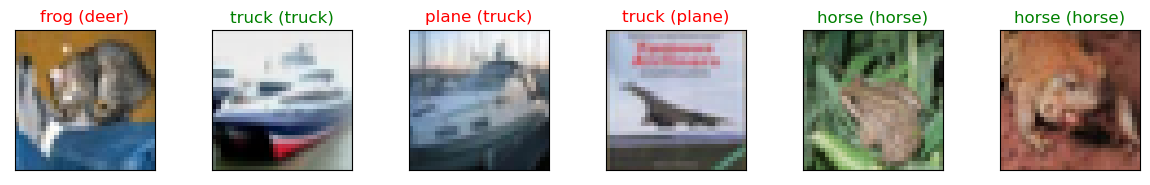

In [14]:
# Visualize Sample Test Results
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()
images.numpy()

# Get sample outputs
output = model(Variable(images))
# Convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())

# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(6):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(f'{classes[preds[idx]]} ({classes[labels[idx]]})', color=("green" if preds[idx]==labels[idx].item() else "red"))